# Visualizing Errors

For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself. For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe. I known that the current literature suggests a value of around 71 (km/s)Mpc, and I measure a value of 74(km/s) Mpc with my method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.

Suppose I augment this information with reported uncertainties: the current literature suggests a value of around 71+- 2.5(km/s) Mpc, and my method has measured a value of 74 +- 5(km/s)Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

# Basic Errorbars

A basic errorbar can be created with a single matplotlib function call:

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
import numpy as np

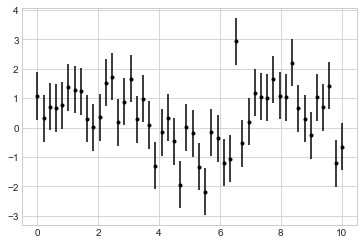

In [4]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Here the `fmt` is a format code controlling the appearance of lines and points, and has the same syntax as the shorthand used in `plt.plot`, outlined in simple ine plots and simple scatter plots.

In addition to these basic options, the `errorbar` function has many options to fine-tune the outputs. Using these additinoal options you can easily customize the aesthetics of your errorbar plot. I often find it helpful, especially in crowded plots, to make the errorbars lighter than the pints themselves:

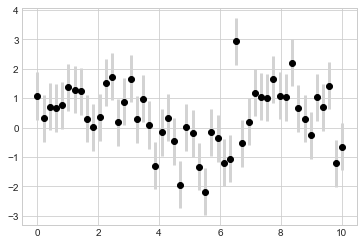

In [11]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);

In addition to these options, you can also specify horizontal errorbars (`xerr`), one-sided errorbars, and many other variants. For more informatino on the options available, refer to the dosctring of `plt.errorbar`.